In [1]:
%matplotlib inline
from tools import *

# Ch04 数据表示与特征工程

-   连续特征 ( Continuous Feature ) 。
-   分类特征 ( Categorical Feature ) ，也叫离散特征 ( Discrete Feature ) 。

特征工程：找到最佳的数据表示。

虽然神经网络已经可以自动完成特征的选择和变换，但是深入学习特征变换的原理，可以帮助理解神经网络对数据进行了哪种变化，从而加深对数据的理解，能够更加显式地操纵数据变换过程，提高数据变换的效率和加入更多的先验信息。

## 4.3 交互特征与多项式特征

添加原始数据的交互特征 ( Interaction Feature ) 和多项式特征 ( Polynomial Feature )
可以丰富特征表示。

为数据集和模型的所有组合寻找最佳变换是一门艺术。

-   对于复杂度较低的模型 ( 线性模型和朴素贝叶斯模型 ) ，数据变换提高模型的精确度；
-   对于复杂度较高的模型 ( 随机森林和梯度提升树 ) ，数据变换可能会降低模型的精确度，因为模型自己可以发现重要的交互项，人工的数据变换反而会影响数据的原有分布情况。
-   对于其他模型 ( SVM、最近邻、神经网络 ) ，数据变换有的时候也能够改善模型的性能，只是效果不如线性模型那么显著。

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=120)

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [3]:
# 混合原始特征与分箱特征
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


Text(0.5, 1.0, '图4-3：使用分箱特征和单一全局斜率的线性回归')

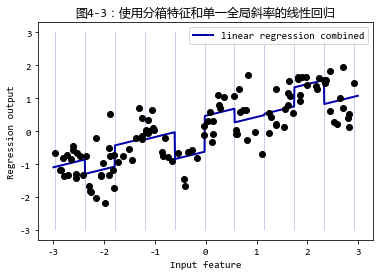

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_combined, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = kb.transform(line)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.title("图4-3：使用分箱特征和单一全局斜率的线性回归")

In [5]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


Text(0.5, 1.0, '图4-4：每个箱子具有不同斜率的线性回归')

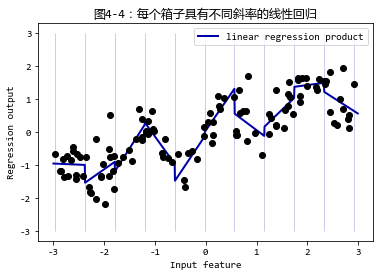

In [6]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.title("图4-4：每个箱子具有不同斜率的线性回归")

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [8]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 10)


In [9]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries of X_poly:
[[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137     0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714  2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125    14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025     0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516   329.222  -679.478  1402.367]]


In [10]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Text(0.5, 1.0, '图4-5：具有10次多项式特征的线性回归--没有One-Hot编码')

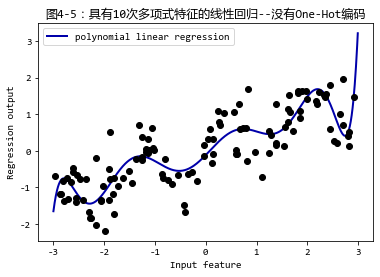

In [11]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.title("图4-5：具有10次多项式特征的线性回归--没有One-Hot编码")

Text(0.5, 0.98, '图4-6：对于RBF核的SVM，使用不同的gamma参数的对比\n不需要显式地特征变换就可以学习得到与多项式回归一样复杂的模型')

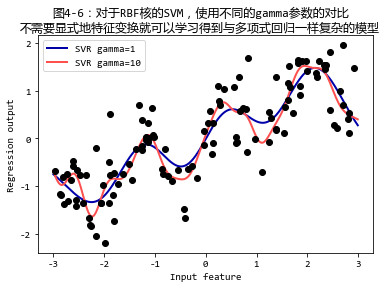

In [12]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.suptitle("图4-6：对于RBF核的SVM，使用不同的gamma参数的对比\n" "不需要显式地特征变换就可以学习得到与多项式回归一样复杂的模型")

In [13]:
# 继续学习多项式特征的应用，数据集为波士顿房价
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [15]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [16]:
# 对比缩放后的数据与增加了特征的数据上在线性模型 Ridge 上的精确度，变换特征后，精确度会得到提升
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("原始数据的模型精度: {:.3f}".format(ridge.score(X_test, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("原始数据，使用交互特征的模型精度: {:.3f}".format(ridge.score(X_test_poly, y_test)))
ridge = Ridge().fit(X_train_scaled, y_train)
print("变换尺度后的，没有交互特征的模型精度: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_scaled_poly, y_train)
print("变换尺度后的，使用交互特征的模型精度: {:.3f}".format(ridge.score(X_test_scaled_poly, y_test)))
print("结论：增加交互特征后，精确度会提高")

原始数据的模型精度: 0.627
原始数据，使用交互特征的模型精度: 0.607
变换尺度后的，没有交互特征的模型精度: 0.621
变换尺度后的，使用交互特征的模型精度: 0.753
结论：增加交互特征后，精确度会提高


In [17]:
# 对比缩放后的数据与增加了特征的数据上在随机森林 RandomForest 上的精确度，变换特征后，性能反而会下降（可能是变换特征并非原始特征）
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("原始数据的模型精度: {:.3f}".format(rf.score(X_test, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("原始数据，使用交互特征的模型精度: {:.3f}".format(rf.score(X_test_poly, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("变换尺度后的，没有交互特征的模型精度: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled_poly, y_train)
print("变换尺度后的，使用交互特征的模型精度: {:.3f}".format(rf.score(X_test_scaled_poly, y_test)))
print("结论：增加交互特征后，精确度可能会降低（随机初始化，结果会不同）")

原始数据的模型精度: 0.787
原始数据，使用交互特征的模型精度: 0.731
变换尺度后的，没有交互特征的模型精度: 0.792
变换尺度后的，使用交互特征的模型精度: 0.752
结论：增加交互特征后，精确度可能会降低（随机初始化，结果会不同）


In [18]:
# GradientBoostingRegressor 训练不同特征数据的对比
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=100).fit(X_train, y_train)
print("原始数据的模型精度: {:.3f}".format(gbrt.score(X_test, y_test)))
gbrt = GradientBoostingRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("原始数据，使用交互特征的模型精度: {:.3f}".format(gbrt.score(X_test_poly, y_test)))
gbrt = GradientBoostingRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("变换尺度后的，没有交互特征的模型精度: {:.3f}".format(gbrt.score(X_test_scaled, y_test)))
gbrt = GradientBoostingRegressor(n_estimators=100).fit(X_train_scaled_poly, y_train)
print("变换尺度后的，使用交互特征的模型精度: {:.3f}".format(gbrt.score(X_test_scaled_poly, y_test)))
print("结论：增加交互特征后，精确度可能会降低（随机初始化，结果会不同）")

原始数据的模型精度: 0.825
原始数据，使用交互特征的模型精度: 0.751
变换尺度后的，没有交互特征的模型精度: 0.815
变换尺度后的，使用交互特征的模型精度: 0.781
结论：增加交互特征后，精确度可能会降低（随机初始化，结果会不同）
